In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [69]:
#lms_data= pd.read_csv(r"C:\Users\User\Desktop\project\dataverse_files\HXPC13_DI_v3_11-13-2019.csv")
#lms_data= pd.read_csv(r"C:\Users\User\Desktop\project\hx-mitx-course-person-dataset2013-10k.csv")
lms_data= pd.read_csv(r"C:\Users\User\Desktop\hx-mitx-pers-courseay2013-master.csv")

## Handling Missing Values

In [70]:
lms_data.shape

(100000, 22)

In [71]:
lms_data.head(10)

,course_id,userid_DI,Registered,Viewed,Explored,Certified,Engagement,Location,LevelEducation,YoB,Gender,Grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag,random_number
0,HarvardX/ER22x/2013_Spring,MHxPC130341010,1,1,0,0,1,United States,Bachelor's,1992.0,m,0.05,1/20/2013,7/8/2013,246.0,4.0,NaN,9.0,0,NaN,NaN,0.000002
1,MITx/6.00x/2013_Spring,MHxPC130451014,1,1,0,0,1,Other Europe,Doctorate,1983.0,m,0,3/22/2013,3/22/2013,43.0,1.0,11.0,1.0,0,NaN,NaN,0.000003
2,MITx/14.73x/2013_Spring,MHxPC130255198,1,1,0,0,1,United States,Secondary,1991.0,f,0.01,1/27/2013,2/28/2013,198.0,6.0,36.0,2.0,0,NaN,NaN,0.000005
3,MITx/8.02x/2013_Spring,MHxPC130563002,1,1,0,0,1,Morocco,Bachelor's,1993.0,m,0,2/13/2013,4/13/2013,13.0,5.0,3.0,2.0,0,NaN,NaN,0.000014
4,HarvardX/CB22x/2013_Spring,MHxPC130055735,1,1,0,0,1,United States,NaN,NaN,NaN,0.02,5/1/2013,5/19/2013,249.0,8.0,NaN,5.0,0,NaN,NaN,0.000020
5,HarvardX/ER22x/2013_Spring,MHxPC130380496,1,1,1,1,3,Other Europe,Master's,1989.0,f,0.8,6/18/2013,8/30/2013,1566.0,6.0,NaN,31.0,0,NaN,NaN,0.000023
6,MITx/6.00x/2013_Spring,MHxPC130270406,1,1,0,0,1,Bangladesh,Secondary,1990.0,m,0,12/21/2012,12/21/2012,2.0,1.0,NaN,NaN,0,NaN,NaN,0.000025
7,HarvardX/PH207x/2012_Fall,MHxPC130075954,1,1,0,0,1,Canada,Bachelor's,1985.0,f,0,9/14/2012,10/16/2012,229.0,4.0,99.0,2.0,0,NaN,NaN,0.000031
8,MITx/14.73x/2013_Spring,MHxPC130059497,1,1,0,0,1,Other South Asia,Bachelor's,1983.0,m,0,2/13/2013,4/9/2013,44.0,2.0,10.0,1.0,0,NaN,NaN,0.000032
9,MITx/14.73x/2013_Spring,MHxPC130562668,1,1,0,0,1,United States,Bachelor's,1979.0,f,0,12/19/2012,3/8/2013,66.0,4.0,4.0,2.0,0,NaN,NaN,0.000033


In [72]:
# get the number of missing data points per column
missing_values_count = lms_data.isnull().sum()
missing_values_count

course_id               0
userid_DI               0
Registered              0
Viewed                  0
Explored                0
Certified               0
Engagement              0
Location                0
LevelEducation      18199
YoB                 17221
Gender              15580
Grade                7938
start_time_DI           0
last_event_DI         571
nevents               571
ndays_act             571
nplay_video         44163
nchapters            5446
nforum_posts            0
roles              100000
incomplete_flag    100000
random_number           0
dtype: int64

In [73]:
# how many total missing values do we have?
total_cells = np.product(lms_data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

14.102727272727272


In [74]:
#we drop roles column as it's completely blank because staff and instructors have been removed from the dataset
lms_data.drop(['roles'], axis=1, inplace=True)

In [75]:
# Categorical data (mode imputation)
lms_data['LevelEducation'] = lms_data['LevelEducation'].fillna(lms_data['LevelEducation'].mode()[0])  # Fill with most frequent LoE_DI

In [76]:
# Numerical data (mean imputation)
lms_data['YoB'] = lms_data['YoB'].fillna(lms_data['YoB'].mean())  # Fill YoB with mean

In [77]:
# Categorical data (add unknown category)
lms_data['Gender'] = lms_data['Gender'].fillna('Unknown')

In [78]:
# Other columns
lms_data['last_event_DI'] = lms_data['last_event_DI'].fillna('NA')  # Fill last_event_DI with NA
lms_data['incomplete_flag'] = lms_data['incomplete_flag'].fillna(0)  # Fill incomplete_flag with 0

In [79]:
# Engagement metrics (separate groups based on incomplete_flag)
engagement_metrics = ['nevents', 'ndays_act', 'nplay_video', 'nchapters']

for metric in engagement_metrics:
    # Separate data based on incomplete_flag
    complete_data = lms_data[lms_data['incomplete_flag'] == 0].copy()
    incomplete_data = lms_data[lms_data['incomplete_flag'] == 1].copy()

    # Impute missing values in complete data (fill with 0)
    incomplete_data.loc[:, metric] = incomplete_data[metric].fillna(0)

    # Impute missing values in incomplete data (consider median)
    complete_data.loc[:, metric] = complete_data[metric].fillna(complete_data[metric].median())

    # Update the original dataframe with imputed values
    lms_data.loc[complete_data.index, metric] = complete_data[metric]
    lms_data.loc[incomplete_data.index, metric] = incomplete_data[metric]


In [80]:
lms_data['Grade'] = pd.to_numeric(lms_data['Grade'], errors='coerce')
lms_data['Grade'] = lms_data['Grade'].fillna(lms_data['Grade'].mean())

In [81]:
missing_values_count = lms_data.isnull().sum()
missing_values_count

course_id          0
userid_DI          0
Registered         0
Viewed             0
Explored           0
Certified          0
Engagement         0
Location           0
LevelEducation     0
YoB                0
Gender             0
Grade              0
start_time_DI      0
last_event_DI      0
nevents            0
ndays_act          0
nplay_video        0
nchapters          0
nforum_posts       0
incomplete_flag    0
random_number      0
dtype: int64

In [82]:
# Mapping of course IDs to course names
course_mapping = {
    'HarvardX/ER22x/2013_Spring': 'JusticeX',
    'MITx/6.00x/2013_Spring': 'CS2-MIT',
    'MITx/14.73x/2013_Spring': 'Poverty',
    'MITx/8.02x/2013_Spring': 'E&M',
    'HarvardX/CB22x/2013_Spring': 'HerosX',
    'HarvardX/PH207x/2012_Fall': 'HealthStat',
    'HarvardX/PH278x/2013_Spring': 'HealthEnv',
    'HarvardX/CS50x/2012': 'CS1-H',
    'MITx/6.00x/2012_Fall': 'CS1-MIT',
    'MITx/7.00x/2013_Spring': 'Biology',
    'MITx/3.091x/2012_Fall': 'SSChem1',
    'MITx/3.091x/2013_Spring': 'SSchem2',
    'MITx/8.MReV/2013_Summer': 'MechRev',
    'MITx/2.01x/2013_Spring': 'Structures',
    'MITx/6.002x/2012_Fall': 'Circuits1',
    'MITx/6.002x/2013_Spring': 'Circuits2'
}

# Add 'Course' column to existing lms_data DataFrame next to 'course_id' column
lms_data.insert(loc=lms_data.columns.get_loc('course_id') + 1, column='Course', value=lms_data['course_id'].map(course_mapping))

print(lms_data)


                        course_id     Course       userid_DI  Registered  \
0      HarvardX/ER22x/2013_Spring   JusticeX  MHxPC130341010           1   
1          MITx/6.00x/2013_Spring    CS2-MIT  MHxPC130451014           1   
2         MITx/14.73x/2013_Spring    Poverty  MHxPC130255198           1   
3          MITx/8.02x/2013_Spring        E&M  MHxPC130563002           1   
4      HarvardX/CB22x/2013_Spring     HerosX  MHxPC130055735           1   
...                           ...        ...             ...         ...   
99995         HarvardX/CS50x/2012      CS1-H  MHxPC130384165           1   
99996      MITx/6.00x/2013_Spring    CS2-MIT  MHxPC130362312           1   
99997     MITx/6.002x/2013_Spring  Circuits2  MHxPC130305793           1   
99998  HarvardX/ER22x/2013_Spring   JusticeX  MHxPC130164100           1   
99999     MITx/14.73x/2013_Spring    Poverty  MHxPC130002380           1   

       Viewed  Explored  Certified  Engagement  \
0           1         0          0   

In [83]:
# Calculate age based on Year of Birth (YoB)
current_year = 2024  # Assuming the current year is 2024

# Insert the 'Age' column next to the 'YoB' column
lms_data.insert(loc=lms_data.columns.get_loc('YoB') + 1, column='Age', value=current_year - lms_data['YoB'])

print(lms_data)

                        course_id     Course       userid_DI  Registered  \
0      HarvardX/ER22x/2013_Spring   JusticeX  MHxPC130341010           1   
1          MITx/6.00x/2013_Spring    CS2-MIT  MHxPC130451014           1   
2         MITx/14.73x/2013_Spring    Poverty  MHxPC130255198           1   
3          MITx/8.02x/2013_Spring        E&M  MHxPC130563002           1   
4      HarvardX/CB22x/2013_Spring     HerosX  MHxPC130055735           1   
...                           ...        ...             ...         ...   
99995         HarvardX/CS50x/2012      CS1-H  MHxPC130384165           1   
99996      MITx/6.00x/2013_Spring    CS2-MIT  MHxPC130362312           1   
99997     MITx/6.002x/2013_Spring  Circuits2  MHxPC130305793           1   
99998  HarvardX/ER22x/2013_Spring   JusticeX  MHxPC130164100           1   
99999     MITx/14.73x/2013_Spring    Poverty  MHxPC130002380           1   

       Viewed  Explored  Certified  Engagement  \
0           1         0          0   

In [84]:
# Handle invalid datetime values (e.g., replace them with NaT)
lms_data['start_time_DI'] = pd.to_datetime(lms_data['start_time_DI'], errors='coerce')
lms_data['last_event_DI'] = pd.to_datetime(lms_data['last_event_DI'], errors='coerce')

In [85]:
# Calculate duration taken to complete
lms_data['duration_to_complete'] = lms_data['last_event_DI'] - lms_data['start_time_DI']

# Convert 'duration_to_complete' to numeric representation (e.g., days)
lms_data['duration_days'] = lms_data['duration_to_complete'].dt.days

# Drop the original datetime column
lms_data.drop(columns=['duration_to_complete'], inplace=True)

# Insert the new column next to 'last_event_DI' column
last_event_index = lms_data.columns.get_loc('last_event_DI')
lms_data.insert(last_event_index + 1, 'duration_days', lms_data.pop('duration_days'))

# Display the updated DataFrame
print(lms_data.head())

                    course_id    Course       userid_DI  Registered  Viewed  \
0  HarvardX/ER22x/2013_Spring  JusticeX  MHxPC130341010           1       1   
1      MITx/6.00x/2013_Spring   CS2-MIT  MHxPC130451014           1       1   
2     MITx/14.73x/2013_Spring   Poverty  MHxPC130255198           1       1   
3      MITx/8.02x/2013_Spring       E&M  MHxPC130563002           1       1   
4  HarvardX/CB22x/2013_Spring    HerosX  MHxPC130055735           1       1   

   Explored  Certified  Engagement       Location LevelEducation          YoB  \
0         0          0           1  United States     Bachelor's  1992.000000   
1         0          0           1   Other Europe      Doctorate  1983.000000   
2         0          0           1  United States      Secondary  1991.000000   
3         0          0           1        Morocco     Bachelor's  1993.000000   
4         0          0           1  United States     Bachelor's  1985.514829   

         Age   Gender  Grade start_tim

In [86]:
lms_data['duration_days'].dtype

dtype('float64')

In [87]:
from sklearn.impute import SimpleImputer

# Instantiate SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the data and transform the 'duration_days' column
lms_data['duration_days'] = imputer.fit_transform(lms_data[['duration_days']])

## Exploratory Data Analysis

In [88]:
lms_data.describe()

,Registered,Viewed,Explored,Certified,Engagement,YoB,Age,Grade,duration_days,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,random_number
count,100000.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.0,100000.000000
mean,1.0,0.999980,0.115200,0.054190,1.171570,1985.514829,38.485171,0.06693,60.782149,585.595400,7.452900,72.724130,3.95335,0.03600,0.0,0.154846
std,0.0,0.004472,0.319265,0.226393,0.500516,8.140790,8.140790,0.19765,76.534651,1721.225401,13.586766,263.000329,4.72356,0.31033,0.0,0.089435
min,1.0,0.000000,0.000000,0.000000,1.000000,1931.000000,11.000000,0.00000,-308.000000,1.000000,1.000000,1.000000,1.00000,0.00000,0.0,0.000002
25%,1.0,1.000000,0.000000,0.000000,1.000000,1984.000000,33.000000,0.00000,1.000000,16.000000,1.000000,14.000000,2.00000,0.00000,0.0,0.077415
50%,1.0,1.000000,0.000000,0.000000,1.000000,1986.000000,38.000000,0.00000,31.000000,64.000000,3.000000,19.000000,2.00000,0.00000,0.0,0.155477
75%,1.0,1.000000,0.000000,0.000000,1.000000,1991.000000,40.000000,0.02000,93.000000,291.000000,7.000000,24.000000,4.00000,0.00000,0.0,0.232523
max,1.0,1.000000,1.000000,1.000000,3.000000,2013.000000,93.000000,1.01000,409.000000,53180.000000,205.000000,17314.000000,47.00000,20.00000,0.0,0.308927


In [89]:
lms_data.groupby('LevelEducation').size()

LevelEducation
Bachelor's             50852
Doctorate               2244
Less than Secondary     2283
Master's               18522
Secondary              26099
dtype: int64

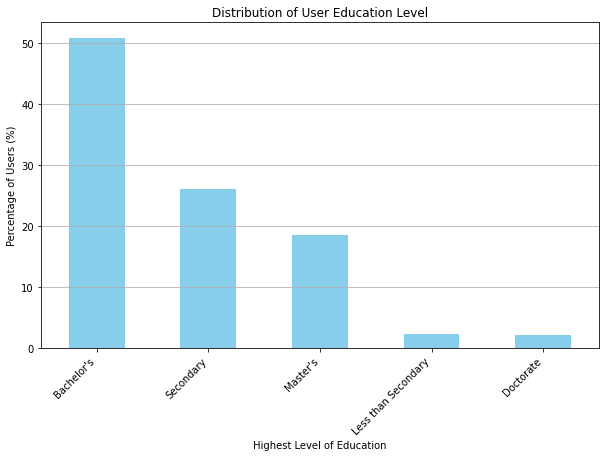

In [90]:
# Get the number (or percentage) of users in each education level
education_counts = lms_data['LevelEducation'].value_counts(normalize=True) * 100  # Calculate percentages

# Create a bar chart for education level distribution with Matplotlib
plt.figure(figsize=(10, 6))
#sns.barplot(x=education_counts.index, y=education_counts.values, color='skyblue')
education_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Highest Level of Education')
plt.ylabel('Percentage of Users (%)')
plt.title('Distribution of User Education Level')
plt.xticks(rotation=45, ha='right')  # Rotate and right-align x-axis labels for readability
plt.grid(axis='y')
plt.show()

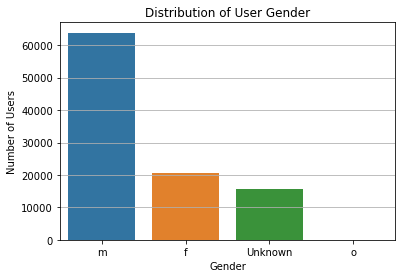

In [91]:
# Get the number of users in each gender category
gender_counts = lms_data['Gender'].value_counts()

# Create a bar chart for gender distribution with Seaborn
sns.barplot(x=gender_counts.index, y=gender_counts.values)  
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.title('Distribution of User Gender')
plt.xticks(rotation=0) 
plt.grid(axis='y')
plt.show()

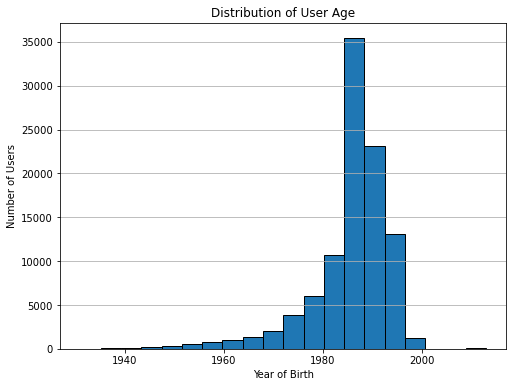

In [92]:
# Create a histogram for age distribution with Matplotlib
plt.figure(figsize=(8, 6)) 
plt.hist(lms_data['YoB'], bins=20, edgecolor='black')
plt.xlabel('Year of Birth')
plt.ylabel('Number of Users')
plt.title('Distribution of User Age')
plt.grid(axis='y')
plt.show()

In [93]:
active_users = len(lms_data[lms_data['Viewed'] == 1])
total_users = len(lms_data)
activity_rate = (active_users / total_users) * 100

print("Percentage of Users with Basic Activity:", activity_rate, "%")

Percentage of Users with Basic Activity: 99.998 %


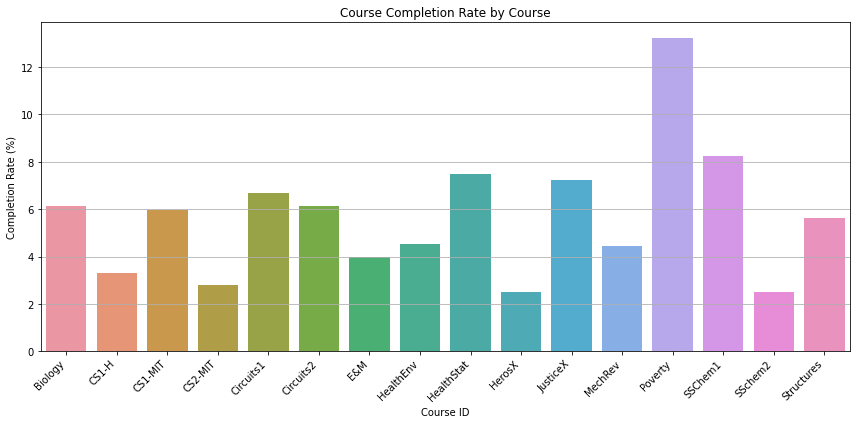

In [94]:
grouped_data = lms_data.groupby('Course')

# Calculate total registrants and certificate earners per course
total_registrants = grouped_data.size()
certificate_earners = grouped_data['Certified'].sum()

# Calculate completion rate (percentage) for each course
completion_rate = (certificate_earners / total_registrants) * 100

# Create a bar chart with Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='course_id', y='completion_rate', data=pd.DataFrame({'course_id': completion_rate.index, 'completion_rate': completion_rate.values}))
plt.xlabel('Course ID')
plt.ylabel('Completion Rate (%)')
plt.title('Course Completion Rate by Course')
plt.xticks(rotation=45, ha='right')  # Rotate and right-align x-axis labels
plt.grid(axis='y')
plt.tight_layout()
plt.show()

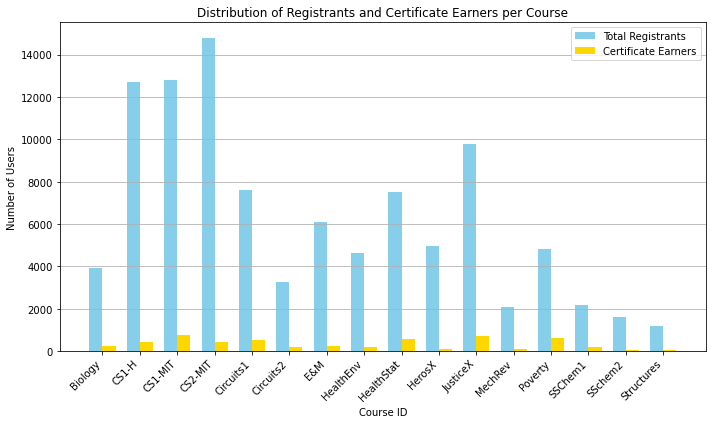

In [95]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Define the width of each bar
bar_width = 0.35

# Calculate the index positions for the bars
index = range(len(total_registrants))

# Plot total registrants
bars1 = ax.bar(index, total_registrants.values, bar_width, label='Total Registrants', color='skyblue')

# Plot certificate earners next to total registrants
bars2 = ax.bar([i + bar_width for i in index], certificate_earners.values, bar_width, label='Certificate Earners', color='gold')

# Set x-axis labels
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(total_registrants.index, rotation=45, ha='right')

# Set labels and title
ax.set_xlabel('Course ID')
ax.set_ylabel('Number of Users')
ax.set_title('Distribution of Registrants and Certificate Earners per Course')

# Add legend
ax.legend()

# Show plot
plt.grid(axis='y')
plt.tight_layout()
plt.show()


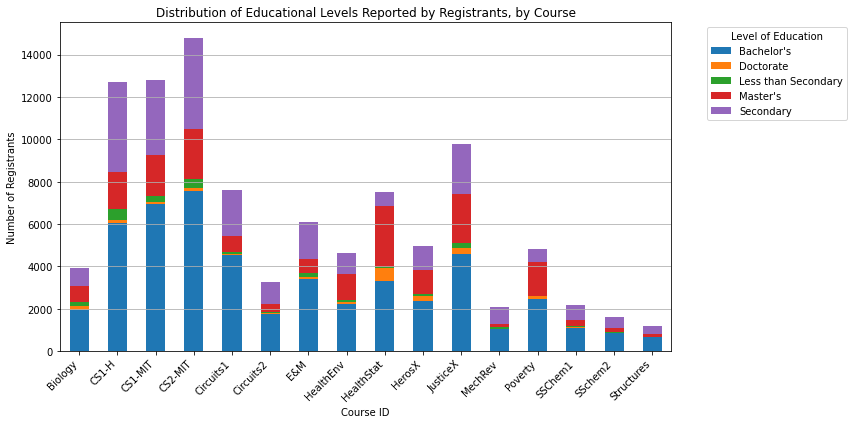

In [96]:
# Group the data by course and LoE (Level of Education)
grouped_data = lms_data.groupby(['Course', 'LevelEducation']).size().unstack()

# Plot the stacked bar chart
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6))

# Set labels and title
plt.xlabel('Course ID')
plt.ylabel('Number of Registrants')
plt.title('Distribution of Educational Levels Reported by Registrants, by Course')

# Rotate and right-align x-axis labels
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend(title='Level of Education', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.grid(axis='y')
plt.tight_layout()
plt.show()

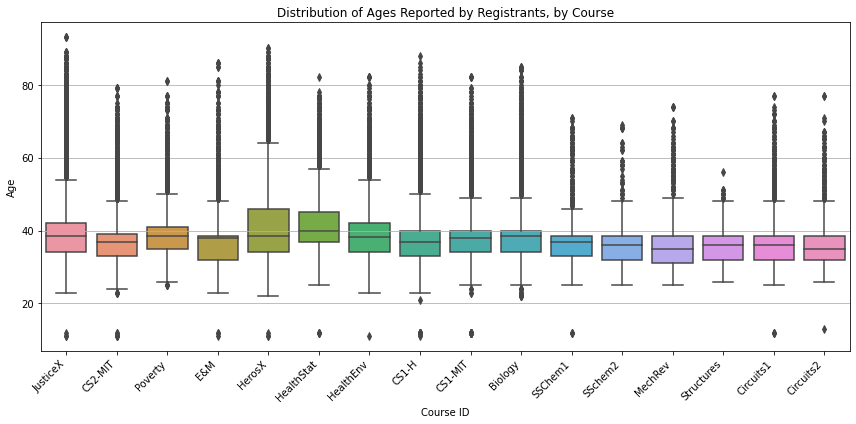

In [97]:
# Filter out rows where YoB (Year of Birth) is not available
filtered_data = lms_data.dropna(subset=['Age'])

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Course', y='Age', data=filtered_data)
plt.xlabel('Course ID')
plt.ylabel('Age')
plt.title('Distribution of Ages Reported by Registrants, by Course')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

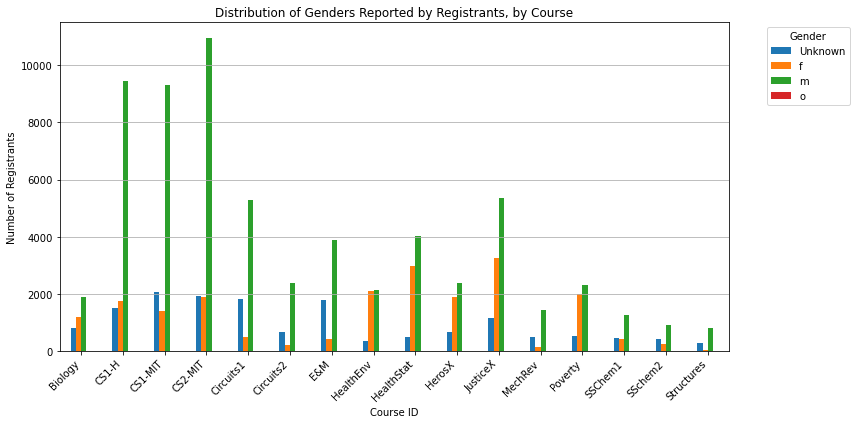

In [98]:
# Group the data by course and gender
grouped_data = lms_data.groupby(['Course', 'Gender']).size().unstack()

# Plot the bar chart
grouped_data.plot(kind='bar', figsize=(12, 6))

# Set labels and title
plt.xlabel('Course ID')
plt.ylabel('Number of Registrants')
plt.title('Distribution of Genders Reported by Registrants, by Course')

# Rotate and right-align x-axis labels
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.grid(axis='y')
plt.tight_layout()
plt.show()


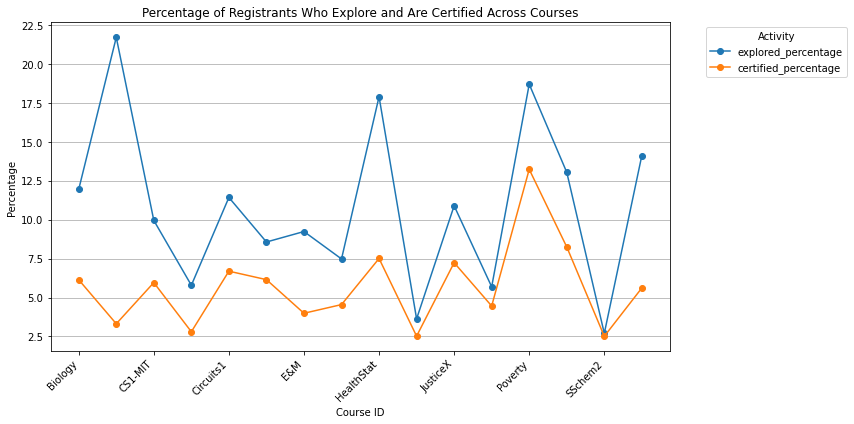

In [99]:
lms_data['explored_percentage'] = (lms_data['Explored'] / lms_data['Registered']) * 100
lms_data['certified_percentage'] = (lms_data['Certified'] / lms_data['Registered']) * 100

# Group the data by course and calculate the mean of percentages
grouped_data = lms_data.groupby('Course').mean()[['explored_percentage', 'certified_percentage']]

# Plot the line chart
grouped_data.plot(kind='line', figsize=(12, 6), marker='o')

# Set labels and title
plt.xlabel('Course ID')
plt.ylabel('Percentage')
plt.title('Percentage of Registrants Who Explore and Are Certified Across Courses')

# Rotate and right-align x-axis labels
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend(title='Activity', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.grid(axis='y')
plt.tight_layout()
plt.show()


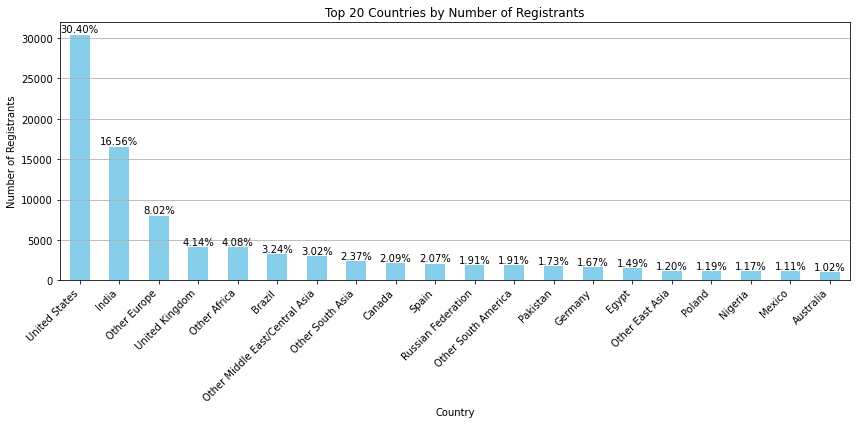

In [100]:
# Get the top 25 countries by the number of registrants
top_countries = lms_data['Location'].value_counts().head(20)

# Calculate the total number of registrants
total_registrants = lms_data['Location'].count()

# Calculate the percentages of registrants accounted for by the top countries
percentage_registrants = (top_countries / total_registrants) * 100

# Plot the bar chart
plt.figure(figsize=(12, 6))
bars = top_countries.plot(kind='bar', color='skyblue')

# Add percentage labels on top of each bar
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval/total_registrants*100:.2f}%', ha='center', va='bottom')

plt.xlabel('Country')
plt.ylabel('Number of Registrants')
plt.title('Top 20 Countries by Number of Registrants')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


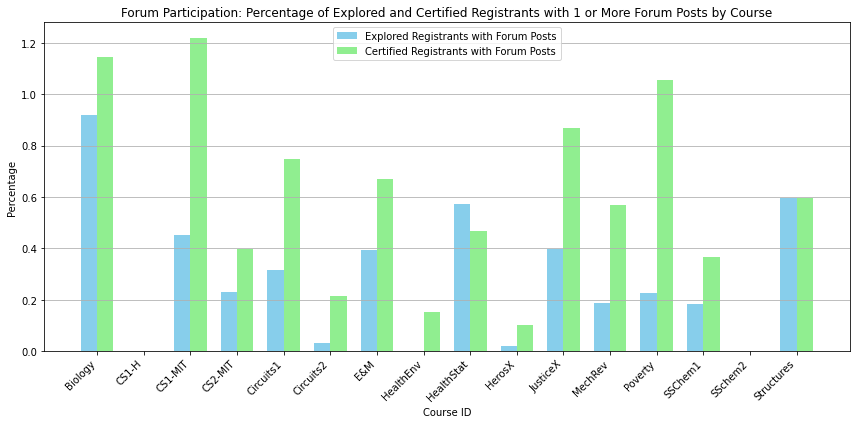

In [101]:
# Filter data for explored registrants and certified registrants with 1 or more forum posts
explored_with_forum = lms_data[(lms_data['Explored'] == 1) & (lms_data['Certified'] == 0) & (lms_data['nforum_posts'] >= 1)]
certified_with_forum = lms_data[(lms_data['Certified'] == 1) & (lms_data['nforum_posts'] >= 1)]

# Group the data by course and calculate the percentages
explored_percentage = (explored_with_forum.groupby('Course').size() / lms_data.groupby('Course').size()) * 100
certified_percentage = (certified_with_forum.groupby('Course').size() / lms_data.groupby('Course').size()) * 100

# Set the width of the bars
bar_width = 0.35

# Set the x locations for the groups
course_indices = np.arange(len(explored_percentage))

# Plot the bars
plt.figure(figsize=(12, 6))
plt.bar(course_indices - bar_width/2, explored_percentage.values, bar_width, label='Explored Registrants with Forum Posts', color='skyblue')
plt.bar(course_indices + bar_width/2, certified_percentage.values, bar_width, label='Certified Registrants with Forum Posts', color='lightgreen')

# Add labels, title, legend, etc.
plt.xlabel('Course ID')
plt.ylabel('Percentage')
plt.title('Forum Participation: Percentage of Explored and Certified Registrants with 1 or More Forum Posts by Course')
plt.xticks(course_indices, explored_percentage.index, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

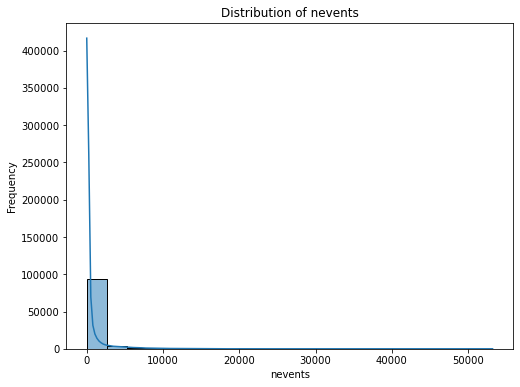

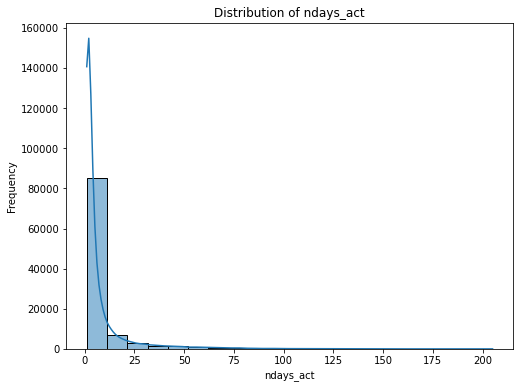

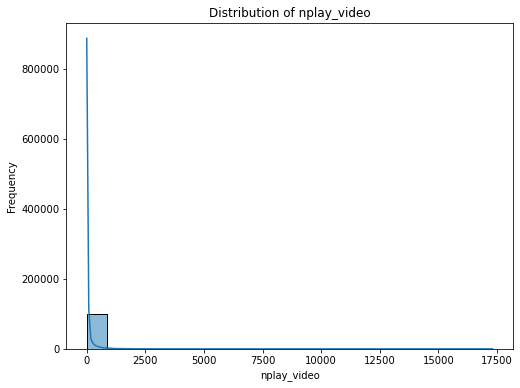

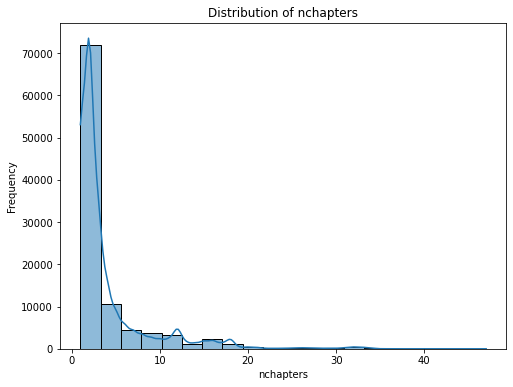

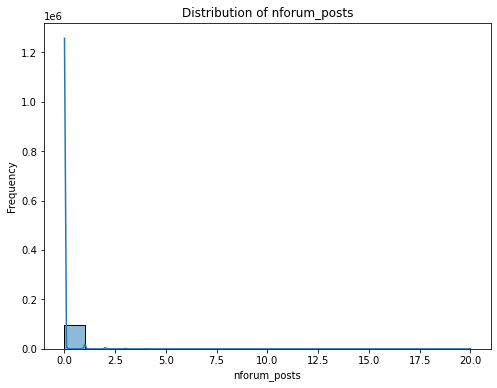

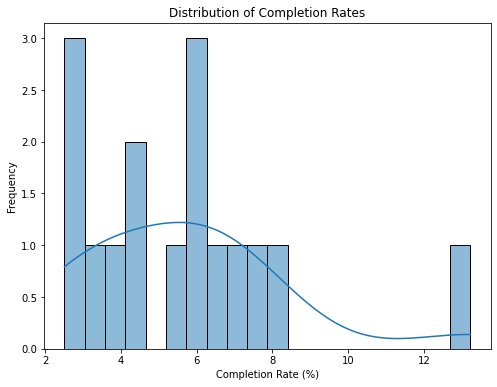

Summary Statistics for Engagement Metrics:
             nevents      ndays_act    nplay_video     nchapters  nforum_posts
count  100000.000000  100000.000000  100000.000000  100000.00000  100000.00000
mean      585.595400       7.452900      72.724130       3.95335       0.03600
std      1721.225401      13.586766     263.000329       4.72356       0.31033
min         1.000000       1.000000       1.000000       1.00000       0.00000
25%        16.000000       1.000000      14.000000       2.00000       0.00000
50%        64.000000       3.000000      19.000000       2.00000       0.00000
75%       291.000000       7.000000      24.000000       4.00000       0.00000
max     53180.000000     205.000000   17314.000000      47.00000      20.00000

Summary Statistics for Completion Rates:
count    16.000000
mean      5.680629
std       2.712807
min       2.509410
25%       3.819588
50%       5.784962
75%       6.826418
max      13.227075
dtype: float64


In [102]:
# Check distribution of engagement metrics
engagement_metrics = ['nevents', 'ndays_act', 'nplay_video', 'nchapters', 'nforum_posts']
for metric in engagement_metrics:
    plt.figure(figsize=(8, 6))
    sns.histplot(lms_data[metric], bins=20, kde=True)
    plt.title(f'Distribution of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Frequency')
    plt.show()

# Check completion rates
plt.figure(figsize=(8, 6))
sns.histplot(completion_rate, bins=20, kde=True)
plt.title('Distribution of Completion Rates')
plt.xlabel('Completion Rate (%)')
plt.ylabel('Frequency')
plt.show()

# Check summary statistics
print("Summary Statistics for Engagement Metrics:")
print(lms_data[engagement_metrics].describe())

print("\nSummary Statistics for Completion Rates:")
print(completion_rate.describe())


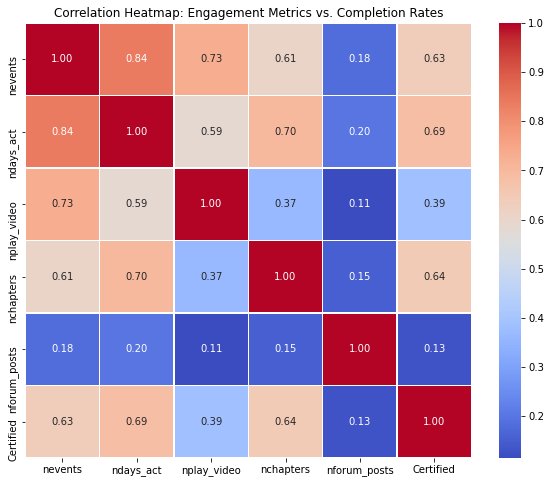

In [103]:
# Select relevant columns for analysis
engagement_columns = ['nevents', 'ndays_act', 'nplay_video', 'nchapters', 'nforum_posts', 'Certified']  # Add more engagement metrics as needed
engagement_data = lms_data[engagement_columns]

# Calculate the correlation matrix
correlation_matrix = engagement_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Engagement Metrics vs. Completion Rates')
plt.show()

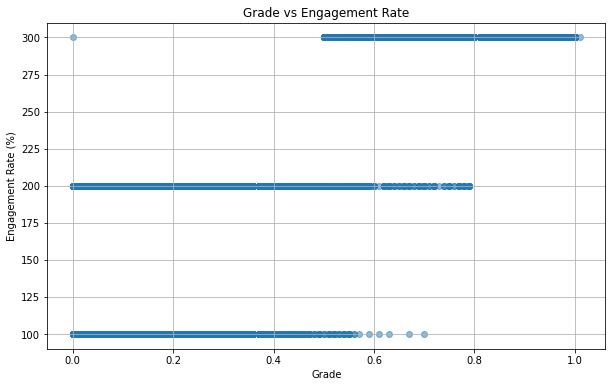

In [104]:
# Plot grade vs engagaement rate
plt.figure(figsize=(10, 6))
plt.scatter(lms_data['Grade'], lms_data['Engagement']*100, alpha=0.5)
plt.title('Grade vs Engagement Rate')
plt.xlabel('Grade')
plt.ylabel('Engagement Rate (%)')
plt.grid(True)
plt.show()

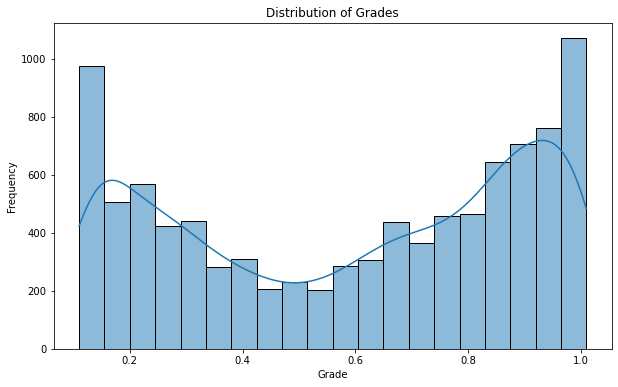

In [105]:
# Filter out grade values of 0.0
non_zero_grades_data = lms_data[lms_data['Grade'] > 0.1]


# Create a histogram for grade distribution
plt.figure(figsize=(10, 6))
sns.histplot(non_zero_grades_data['Grade'], bins=20, kde=True)
plt.title('Distribution of Grades')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()

In [106]:
non_zero_grades_data.shape

(9642, 26)

In [107]:
lms_data.head(20)

,course_id,Course,userid_DI,Registered,Viewed,Explored,Certified,Engagement,Location,LevelEducation,YoB,Age,Gender,Grade,start_time_DI,last_event_DI,duration_days,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,random_number,explored_percentage,certified_percentage
0,HarvardX/ER22x/2013_Spring,JusticeX,MHxPC130341010,1,1,0,0,1,United States,Bachelor's,1992.000000,32.000000,m,0.05000,2013-01-20,2013-07-08,169.0,246.0,4.0,19.0,9.0,0,0.0,0.000002,0.0,0.0
1,MITx/6.00x/2013_Spring,CS2-MIT,MHxPC130451014,1,1,0,0,1,Other Europe,Doctorate,1983.000000,41.000000,m,0.00000,2013-03-22,2013-03-22,0.0,43.0,1.0,11.0,1.0,0,0.0,0.000003,0.0,0.0
2,MITx/14.73x/2013_Spring,Poverty,MHxPC130255198,1,1,0,0,1,United States,Secondary,1991.000000,33.000000,f,0.01000,2013-01-27,2013-02-28,32.0,198.0,6.0,36.0,2.0,0,0.0,0.000005,0.0,0.0
3,MITx/8.02x/2013_Spring,E&M,MHxPC130563002,1,1,0,0,1,Morocco,Bachelor's,1993.000000,31.000000,m,0.00000,2013-02-13,2013-04-13,59.0,13.0,5.0,3.0,2.0,0,0.0,0.000014,0.0,0.0
4,HarvardX/CB22x/2013_Spring,HerosX,MHxPC130055735,1,1,0,0,1,United States,Bachelor's,1985.514829,38.485171,Unknown,0.02000,2013-05-01,2013-05-19,18.0,249.0,8.0,19.0,5.0,0,0.0,0.000020,0.0,0.0
5,HarvardX/ER22x/2013_Spring,JusticeX,MHxPC130380496,1,1,1,1,3,Other Europe,Master's,1989.000000,35.000000,f,0.80000,2013-06-18,2013-08-30,73.0,1566.0,6.0,19.0,31.0,0,0.0,0.000023,100.0,100.0
6,MITx/6.00x/2013_Spring,CS2-MIT,MHxPC130270406,1,1,0,0,1,Bangladesh,Secondary,1990.000000,34.000000,m,0.00000,2012-12-21,2012-12-21,0.0,2.0,1.0,19.0,2.0,0,0.0,0.000025,0.0,0.0
7,HarvardX/PH207x/2012_Fall,HealthStat,MHxPC130075954,1,1,0,0,1,Canada,Bachelor's,1985.000000,39.000000,f,0.00000,2012-09-14,2012-10-16,32.0,229.0,4.0,99.0,2.0,0,0.0,0.000031,0.0,0.0
8,MITx/14.73x/2013_Spring,Poverty,MHxPC130059497,1,1,0,0,1,Other South Asia,Bachelor's,1983.000000,41.000000,m,0.00000,2013-02-13,2013-04-09,55.0,44.0,2.0,10.0,1.0,0,0.0,0.000032,0.0,0.0
9,MITx/14.73x/2013_Spring,Poverty,MHxPC130562668,1,1,0,0,1,United States,Bachelor's,1979.000000,45.000000,f,0.00000,2012-12-19,2013-03-08,79.0,66.0,4.0,4.0,2.0,0,0.0,0.000033,0.0,0.0


## Data Transformation for Modeling

In [108]:
# Get list of categorical variables
s = (lms_data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['course_id', 'Course', 'userid_DI', 'Location', 'LevelEducation', 'Gender']


In [109]:
lms_data['Location'].unique()

array(['United States', 'Other Europe', 'Morocco', 'Bangladesh', 'Canada',
       'Other South Asia', 'India', 'Other Africa', 'Australia',
       'Other South America', 'Philippines', 'China', 'Spain', 'Nigeria',
       'Brazil', 'Germany', 'Japan', 'United Kingdom',
       'Russian Federation', 'Mexico', 'Other Middle East/Central Asia',
       'Other East Asia', 'Ukraine', 'Greece',
       'Other North & Central Amer., Caribbean', 'Egypt', 'Poland',
       'Portugal', 'Colombia', 'Pakistan', 'Indonesia', 'France',
       'Other Oceania', 'Unknown/Other'], dtype=object)

In [110]:
from sklearn.preprocessing import OrdinalEncoder

# Drop rows with missing values in 'LoE_DI' column
lms_data.dropna(subset=['LevelEducation'], inplace=True)

# Ordinal encoding for 'LoE_DI' column
loE_encoder = OrdinalEncoder(categories=[['Less than Secondary', 'Secondary', 'Bachelor\'s', 'Master\'s', 'Doctorate']])
lms_data['LevelEducation'] = loE_encoder.fit_transform(lms_data[['LevelEducation']])

# Display the updated DataFrame
print(lms_data.head())

                    course_id    Course       userid_DI  Registered  Viewed  \
0  HarvardX/ER22x/2013_Spring  JusticeX  MHxPC130341010           1       1   
1      MITx/6.00x/2013_Spring   CS2-MIT  MHxPC130451014           1       1   
2     MITx/14.73x/2013_Spring   Poverty  MHxPC130255198           1       1   
3      MITx/8.02x/2013_Spring       E&M  MHxPC130563002           1       1   
4  HarvardX/CB22x/2013_Spring    HerosX  MHxPC130055735           1       1   

   Explored  Certified  Engagement       Location  LevelEducation  \
0         0          0           1  United States             2.0   
1         0          0           1   Other Europe             4.0   
2         0          0           1  United States             1.0   
3         0          0           1        Morocco             2.0   
4         0          0           1  United States             2.0   

           YoB        Age   Gender  Grade start_time_DI last_event_DI  \
0  1992.000000  32.000000        m   

## Principal Component Analysis

In [111]:
from sklearn.preprocessing import MinMaxScaler

# Select the numerical features to be scaled
numerical_cols = ['LevelEducation', 'duration_days', 'nevents', 'ndays_act', 'nplay_video', 'nchapters']

# Normalize numerical columns
scaler = MinMaxScaler()
scaler.fit(lms_data[numerical_cols])
lms_data[numerical_cols] = scaler.transform(lms_data[numerical_cols])


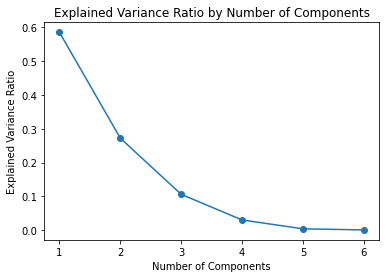

Component 1: Explained Variance Ratio = 0.5849
Component 2: Explained Variance Ratio = 0.2722
Component 3: Explained Variance Ratio = 0.1064
Component 4: Explained Variance Ratio = 0.0307
Component 5: Explained Variance Ratio = 0.0045
Component 6: Explained Variance Ratio = 0.0013


In [112]:
from sklearn.decomposition import PCA

# Select the features for PCA
features_for_pca = ['LevelEducation','duration_days', 'nevents', 'ndays_act', 'nplay_video', 'nchapters']

# Instantiate PCA object without specifying the number of components
pca = PCA()

# Fit PCA to the data
pca.fit(lms_data[features_for_pca])

# Plot the explained variance ratio
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Components')
plt.show()

# Print the explained variance ratio for each component
for i, explained_variance in enumerate(pca.explained_variance_ratio_, 1):
    print(f"Component {i}: Explained Variance Ratio = {explained_variance:.4f}")

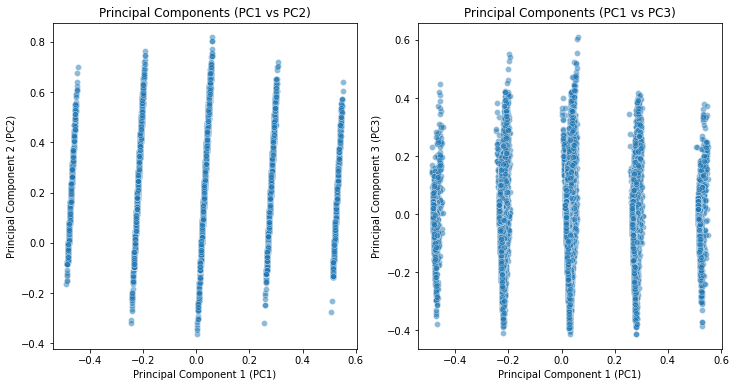

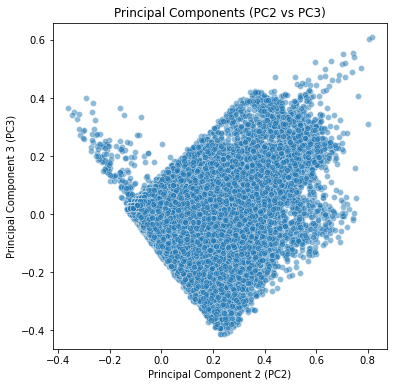

<Figure size 432x288 with 0 Axes>

In [114]:
from sklearn.decomposition import PCA

# Instantiate PCA object with 3 components
pca = PCA(n_components=3)

# Fit PCA to the data
principal_components = pca.fit_transform(lms_data[features_for_pca])

# Create a DataFrame to store the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Concatenate principal components with the original dataset
lms_data_with_pca = pd.concat([lms_data, principal_df], axis=1)


# Visualize principal components
plt.figure(figsize=(12, 6))

# Plot PC1 vs PC2
plt.subplot(1, 2, 1)
sns.scatterplot(data=principal_df, x='PC1', y='PC2', alpha=0.5)
plt.title('Principal Components (PC1 vs PC2)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')

# Plot PC1 vs PC3
plt.subplot(1, 2, 2)
sns.scatterplot(data=principal_df, x='PC1', y='PC3', alpha=0.5)
plt.title('Principal Components (PC1 vs PC3)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 3 (PC3)')

# Visualize PC2 vs PC3
plt.figure(figsize=(6, 6))
sns.scatterplot(data=principal_df, x='PC2', y='PC3', alpha=0.5)
plt.title('Principal Components (PC2 vs PC3)')
plt.xlabel('Principal Component 2 (PC2)')
plt.ylabel('Principal Component 3 (PC3)')
plt.show()


plt.tight_layout()
plt.show()



In [115]:
# Summary statistics of principal components
pc_summary = principal_df.describe()

# Correlation matrix of principal components
pc_corr = principal_df.corr()

print("Summary Statistics of Principal Components:")
print(pc_summary)

print("\nCorrelation Matrix of Principal Components:")
print(pc_corr)

Summary Statistics of Principal Components:
                PC1           PC2           PC3
count  1.000000e+05  1.000000e+05  1.000000e+05
mean  -2.232346e-17  5.698386e-17 -7.961728e-17
std    1.972091e-01  1.345371e-01  8.411104e-02
min   -4.891609e-01 -3.626307e-01 -4.127958e-01
25%   -2.247544e-01 -8.917425e-02 -2.850425e-02
50%    1.597139e-02 -5.084804e-02  1.970248e-02
75%    2.980290e-02  3.766496e-02  3.294713e-02
max    5.525207e-01  8.166877e-01  6.084342e-01

Correlation Matrix of Principal Components:
              PC1           PC2           PC3
PC1  1.000000e+00 -2.832788e-17  3.415420e-17
PC2 -2.832788e-17  1.000000e+00  1.026521e-16
PC3  3.415420e-17  1.026521e-16  1.000000e+00


## K-Means Clustering

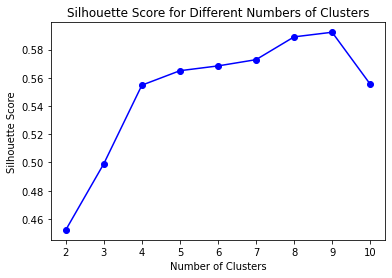

Number of Clusters: 2, Silhouette Score: 0.4522
Number of Clusters: 3, Silhouette Score: 0.4992
Number of Clusters: 4, Silhouette Score: 0.5548
Number of Clusters: 5, Silhouette Score: 0.5651
Number of Clusters: 6, Silhouette Score: 0.5685
Number of Clusters: 7, Silhouette Score: 0.5729
Number of Clusters: 8, Silhouette Score: 0.5891
Number of Clusters: 9, Silhouette Score: 0.5923
Number of Clusters: 10, Silhouette Score: 0.5556
Optimal number of clusters: 9


In [116]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Extract the selected principal components for clustering
selected_components = principal_df[['PC1', 'PC2', 'PC3']]

# Range of clusters to try
k_range = range(2, 11)

# List to store silhouette scores
silhouette_scores = []

# Perform K-means clustering for different values of k and calculate silhouette scores
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(selected_components)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(selected_components, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

# Print the silhouette scores for each number of clusters
for k, silhouette in zip(k_range, silhouette_scores):
    print(f"Number of Clusters: {k}, Silhouette Score: {silhouette:.4f}")

# Choose the optimal number of clusters based on the silhouette score
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters: {optimal_k}")

In [117]:
# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(selected_components)
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
principal_df['Cluster'] = cluster_labels

# Display the counts of data points in each cluster
print(principal_df['Cluster'].value_counts())

# Display cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

1    37309
2    20076
3    17378
6     7580
5     5073
0     4456
7     3323
4     2691
8     2114
Name: Cluster, dtype: int64
Cluster Centers:
[[ 0.02679361  0.16906809  0.05121508]
 [ 0.0160012  -0.06467281  0.0117575 ]
 [-0.23372233 -0.05307255  0.01770669]
 [ 0.29439463 -0.05985951 -0.00095154]
 [ 0.31224669  0.28357361  0.08236234]
 [-0.2295054   0.14326285 -0.10032441]
 [ 0.04732048  0.11331767 -0.16571319]
 [-0.04719449  0.43413191  0.15659573]
 [-0.48189237 -0.00936124  0.00904803]]


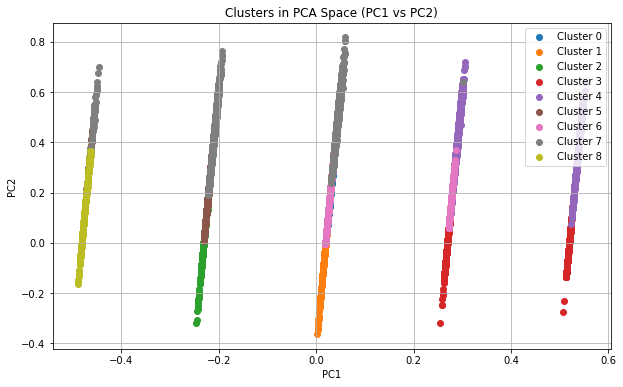

Mean Values of Features for Each Cluster:
              PC1       PC2       PC3
Cluster                              
0        0.026741  0.167938  0.051279
1        0.015998 -0.064733  0.011726
2       -0.233722 -0.053073  0.017707
3        0.294395 -0.059860 -0.000952
4        0.312271  0.283623  0.082544
5       -0.229508  0.143237 -0.100364
6        0.047401  0.113547 -0.165787
7       -0.047071  0.433870  0.156374
8       -0.481892 -0.009361  0.009048


In [118]:
# Get the number of unique cluster labels
num_clusters = len(principal_df['Cluster'].unique())

# Plot clusters in the PCA space
plt.figure(figsize=(10, 6))
for cluster_label in range(num_clusters):
    cluster_data = principal_df[principal_df['Cluster'] == cluster_label]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster_label}')

plt.title('Clusters in PCA Space (PC1 vs PC2)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

# Calculate mean values of features for each cluster
cluster_means = principal_df.groupby('Cluster').mean()

# Display mean values of features for each cluster
print("Mean Values of Features for Each Cluster:")
print(cluster_means)

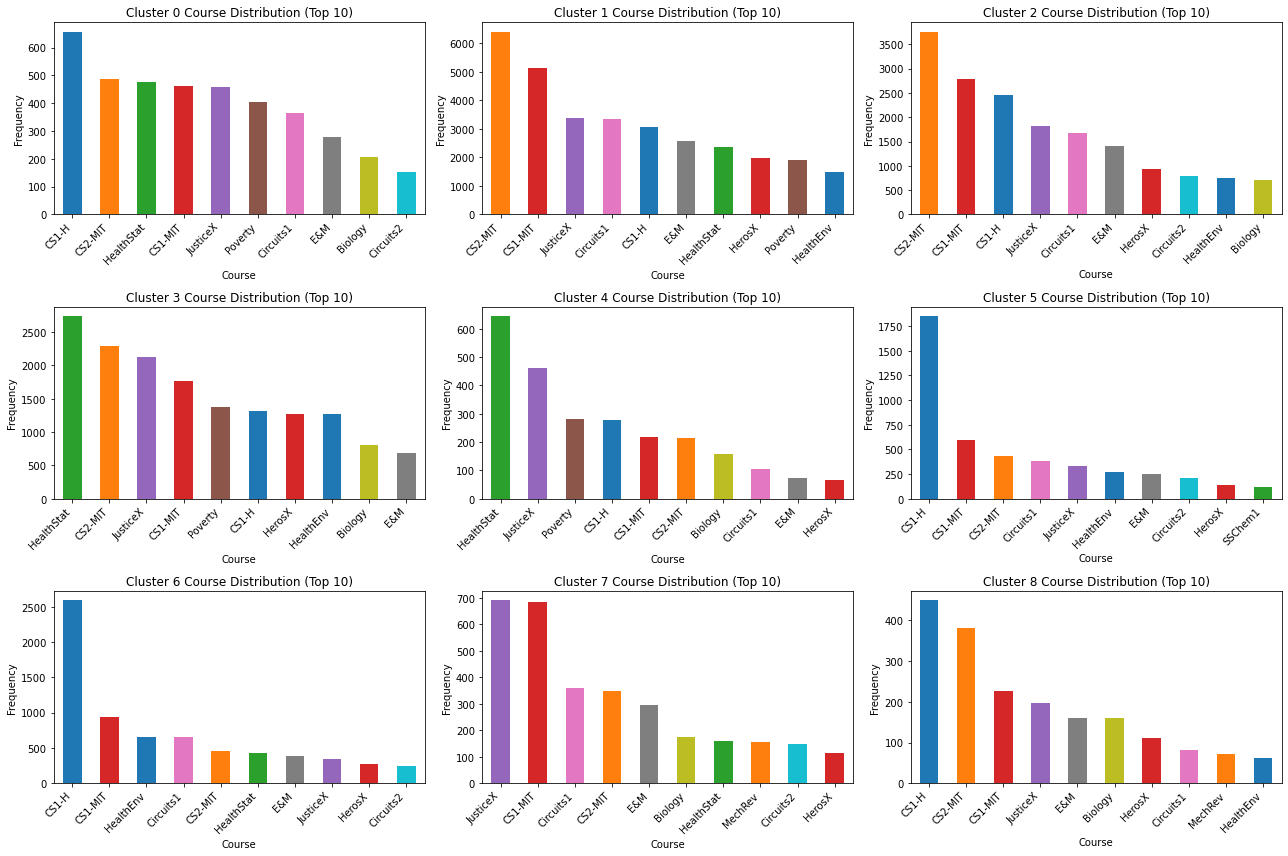

In [119]:
# Count occurrences of each course within each cluster
course_counts = {}
course_colors = {}

for cluster_label in range(num_clusters):
    cluster_data = principal_df[principal_df['Cluster'] == cluster_label]
    cluster_courses = cluster_data.merge(lms_data[['Course']], left_index=True, right_index=True)['Course']
    course_counts[cluster_label] = cluster_courses.value_counts()

# Generate a larger color palette with more distinct colors
larger_palette = sns.color_palette('tab10', n_colors=len(course_counts[0]))

# Assign colors to courses
for course, color in zip(course_counts[0].index, larger_palette):
    course_colors[course] = color

# Visualize course distributions within each cluster
plt.figure(figsize=(18, 12))
for cluster_label in range(num_clusters):
    plt.subplot(3, 3, cluster_label + 1)
    course_counts[cluster_label].sort_values(ascending=False)[:10].plot(kind='bar', color=[course_colors.get(course, 'gray') for course in course_counts[cluster_label].index])
    plt.title(f'Cluster {cluster_label} Course Distribution (Top 10)')
    plt.xlabel('Course')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.tight_layout()

plt.show()


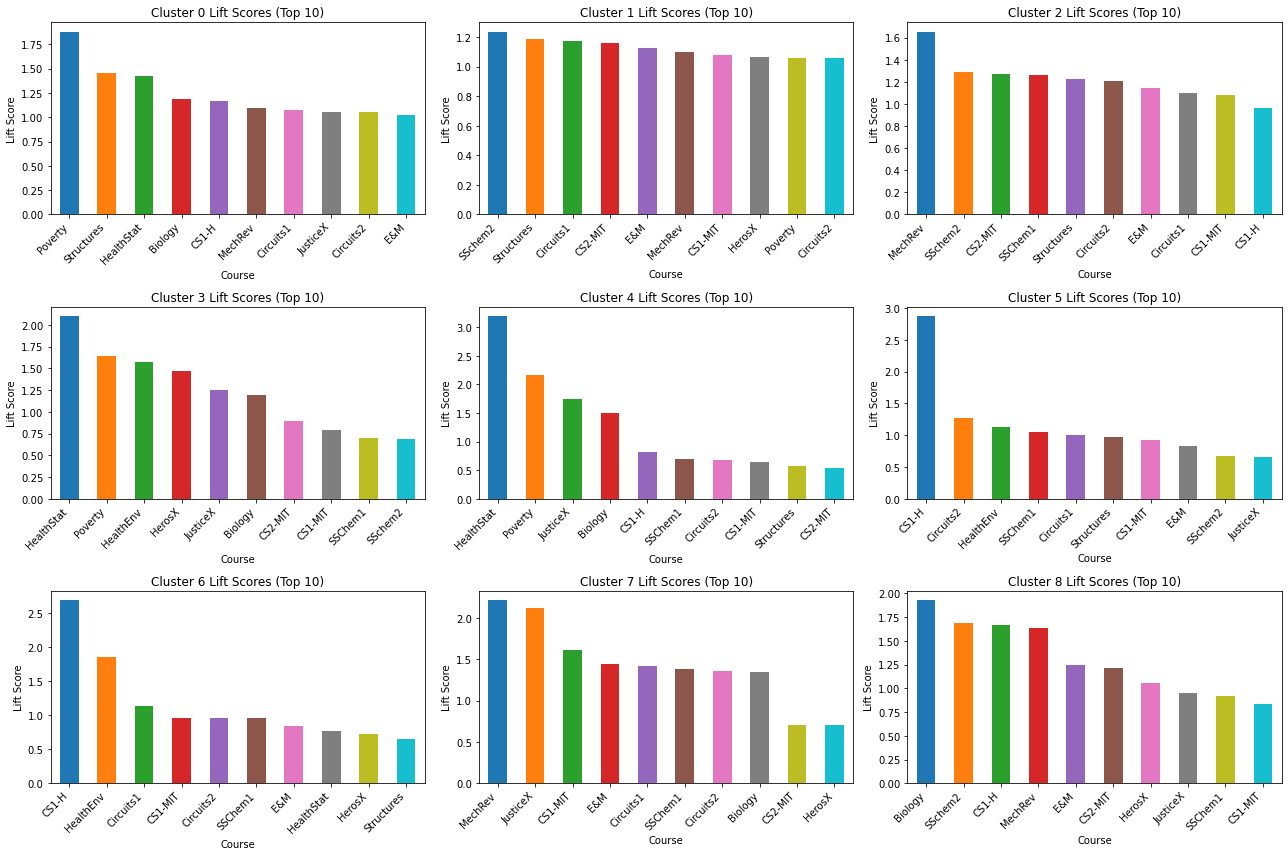

In [120]:
# Calculate total course counts (optional, depending on your data structure)
total_course_counts = lms_data['Course'].value_counts()  # Assuming 'Course' is your course ID column

# Calculate lift scores for each course in each cluster
lift_scores = {}
for cluster_label in range(num_clusters):
    cluster_data = principal_df[principal_df['Cluster'] == cluster_label]
    cluster_courses = cluster_data.merge(lms_data[['Course']], left_index=True, right_index=True)['Course']
    cluster_course_counts = cluster_courses.value_counts()
    lift_scores[cluster_label] = (cluster_course_counts / len(cluster_data)) / (total_course_counts / len(lms_data))  # Assuming 'lms_data' represents all user data

# Generate a larger color palette with more distinct colors
larger_palette = sns.color_palette('tab10', n_colors=len(lift_scores[0]))

# Assign colors to courses (optional, for aesthetics)
course_colors = {}
for course, color in zip(lift_scores[0].index, larger_palette):
    course_colors[course] = color

# Visualize lift scores within each cluster
plt.figure(figsize=(18, 12))
for cluster_label in range(num_clusters):
    plt.subplot(3, 3, cluster_label + 1)
    lift_scores[cluster_label].sort_values(ascending=False)[:10].plot(kind='bar', color=[course_colors.get(course, 'gray') for course in lift_scores[cluster_label].index])
    plt.title(f'Cluster {cluster_label} Lift Scores (Top 10)')
    plt.xlabel('Course')
    plt.ylabel('Lift Score')  # Label changed to reflect lift score
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.tight_layout()

plt.show()


# Modeling

In [121]:
print(lms_data.columns)

Index(['course_id', 'Course', 'userid_DI', 'Registered', 'Viewed', 'Explored',
       'Certified', 'Engagement', 'Location', 'LevelEducation', 'YoB', 'Age',
       'Gender', 'Grade', 'start_time_DI', 'last_event_DI', 'duration_days',
       'nevents', 'ndays_act', 'nplay_video', 'nchapters', 'nforum_posts',
       'incomplete_flag', 'random_number', 'explored_percentage',
       'certified_percentage'],
      dtype='object')


In [122]:
print(principal_df.columns)

Index(['PC1', 'PC2', 'PC3', 'Cluster'], dtype='object')


In [123]:
# Merge the 'Cluster' column from 'principal_df' into 'lms_data' based on index
lms_data = lms_data.merge(principal_df[['Cluster', 'PC1', 'PC2', 'PC3']], left_index=True, right_index=True)

In [70]:
#lms_data = lms_data.drop(['Cluster_x', 'Cluster_y', 'PC1', 'PC2', 'PC3'], axis=1)

In [124]:
lms_data.head(20)

,course_id,Course,userid_DI,Registered,Viewed,Explored,Certified,Engagement,Location,LevelEducation,YoB,Age,Gender,Grade,start_time_DI,last_event_DI,duration_days,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,random_number,explored_percentage,certified_percentage,Cluster,PC1,PC2,PC3
0,HarvardX/ER22x/2013_Spring,JusticeX,MHxPC130341010,1,1,0,0,1,United States,0.50,1992.000000,32.000000,m,0.05000,2013-01-20,2013-07-08,0.665272,0.004607,0.014706,0.001040,0.173913,0,0.0,0.000002,0.0,0.0,0,0.026444,0.157231,-0.058911
1,MITx/6.00x/2013_Spring,CS2-MIT,MHxPC130451014,1,1,0,0,1,Other Europe,1.00,1983.000000,41.000000,m,0.00000,2013-03-22,2013-03-22,0.429568,0.000790,0.000000,0.000578,0.000000,0,0.0,0.000003,0.0,0.0,3,0.513195,-0.134681,0.019347
2,MITx/14.73x/2013_Spring,Poverty,MHxPC130255198,1,1,0,0,1,United States,0.25,1991.000000,33.000000,f,0.01000,2013-01-27,2013-02-28,0.474198,0.003704,0.024510,0.002022,0.021739,0,0.0,0.000005,0.0,0.0,2,-0.233312,-0.045471,0.004527
3,MITx/8.02x/2013_Spring,E&M,MHxPC130563002,1,1,0,0,1,Morocco,0.50,1993.000000,31.000000,m,0.00000,2013-02-13,2013-04-13,0.511855,0.000226,0.019608,0.000116,0.021739,0,0.0,0.000014,0.0,0.0,1,0.017325,-0.036780,-0.026714
4,HarvardX/CB22x/2013_Spring,HerosX,MHxPC130055735,1,1,0,0,1,United States,0.50,1985.514829,38.485171,Unknown,0.02000,2013-05-01,2013-05-19,0.454672,0.004663,0.034314,0.001040,0.086957,0,0.0,0.000020,0.0,0.0,1,0.018042,-0.023594,0.059008
5,HarvardX/ER22x/2013_Spring,JusticeX,MHxPC130380496,1,1,1,1,3,Other Europe,0.75,1989.000000,35.000000,f,0.80000,2013-06-18,2013-08-30,0.531381,0.029429,0.024510,0.001040,0.652174,0,0.0,0.000023,100.0,100.0,4,0.287420,0.380381,0.324214
6,MITx/6.00x/2013_Spring,CS2-MIT,MHxPC130270406,1,1,0,0,1,Bangladesh,0.25,1990.000000,34.000000,m,0.00000,2012-12-21,2012-12-21,0.429568,0.000019,0.000000,0.001040,0.021739,0,0.0,0.000025,0.0,0.0,2,-0.235219,-0.083654,0.032992
7,HarvardX/PH207x/2012_Fall,HealthStat,MHxPC130075954,1,1,0,0,1,Canada,0.50,1985.000000,39.000000,f,0.00000,2012-09-14,2012-10-16,0.474198,0.004287,0.014706,0.005660,0.021739,0,0.0,0.000031,0.0,0.0,1,0.016184,-0.061361,0.002044
8,MITx/14.73x/2013_Spring,Poverty,MHxPC130059497,1,1,0,0,1,Other South Asia,0.50,1983.000000,41.000000,m,0.00000,2013-02-13,2013-04-09,0.506276,0.000809,0.004902,0.000520,0.000000,0,0.0,0.000032,0.0,0.0,1,0.016168,-0.060083,-0.038161
9,MITx/14.73x/2013_Spring,Poverty,MHxPC130562668,1,1,0,0,1,United States,0.50,1979.000000,45.000000,f,0.00000,2012-12-19,2013-03-08,0.539749,0.001222,0.014706,0.000173,0.021739,0,0.0,0.000033,0.0,0.0,1,0.018043,-0.021073,-0.049343


To make recommendations using the KNN algorithm and the clusters we've generated, we'll follow these steps:

Assign users to clusters: Use the KNN algorithm to predict which cluster each user belongs to based on their features.

Recommend top courses: For each user, recommend the top courses from the cluster they belong to.

In this code:

We first train the KNN model on the training set to predict clusters for users.

Then, we predict clusters for users in the test set.

Finally, we define a function recommend_courses_for_user to recommend courses for a given user based on their predicted cluster.

We retrieve the top courses for the predicted cluster and return them as recommendations for the user.

Make sure to replace 'CourseA', 'CourseB', etc., with actual course names or IDs from your dataset, and adjust the top_courses_by_cluster dictionary according to the top courses in each cluster.

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split dataset into features (X) and target variable (y)
X = lms_data[['PC1', 'PC2']]
y = lms_data['Cluster']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN model
k = 9  # Example: number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Predict cluster for new users
#new_user = [[new_user_PC1, new_user_PC2, new_user_PC3]]  # Replace with actual principal components of new user
#new_user_scaled = scaler.transform(new_user)
#predicted_cluster = knn.predict(new_user_scaled)
#print("Predicted Cluster for New User:", predicted_cluster)


Accuracy: 0.9394


In [126]:
y_pred_train = knn.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9505


In [127]:
# check class distribution in test set

y_test.value_counts()

1    7642
2    3954
3    3408
6    1457
5    1035
0     855
7     669
4     568
8     412
Name: Cluster, dtype: int64

In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define parameter grid for KNN
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]} 

# Create KNN classifier
knn = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best KNN classifier and its performance
best_knn = grid_search.best_estimator_
best_accuracy = grid_search.best_score_

# Print the best hyperparameters and performance
print("Best hyperparameters for KNN:", grid_search.best_params_)
print("Best cross-validation accuracy for KNN:", best_accuracy)

# Evaluate the best KNN classifier on the test set
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("KNN Test Accuracy:", accuracy)


Best hyperparameters for KNN: {'n_neighbors': 5}
Best cross-validation accuracy for KNN: 0.9371125000000001
KNN Test Accuracy: 0.9404


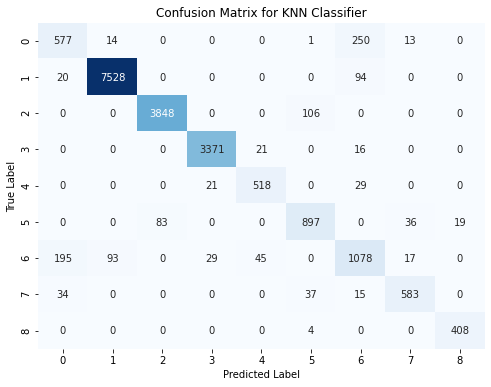

In [129]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for the best KNN classifier
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

In [130]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Perform cross-validated predictions using the best KNN classifier
y_pred_cv = cross_val_predict(best_knn, X, y, cv=5)

# Generate classification report
report = classification_report(y, y_pred_cv)

# Print classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.68      0.70      4456
           1       0.99      0.99      0.99     37309
           2       0.98      0.97      0.97     20076
           3       0.98      0.99      0.99     17378
           4       0.88      0.91      0.89      2691
           5       0.83      0.87      0.85      5073
           6       0.74      0.74      0.74      7580
           7       0.88      0.87      0.88      3323
           8       0.97      0.98      0.98      2114

    accuracy                           0.94    100000
   macro avg       0.88      0.89      0.89    100000
weighted avg       0.94      0.94      0.94    100000



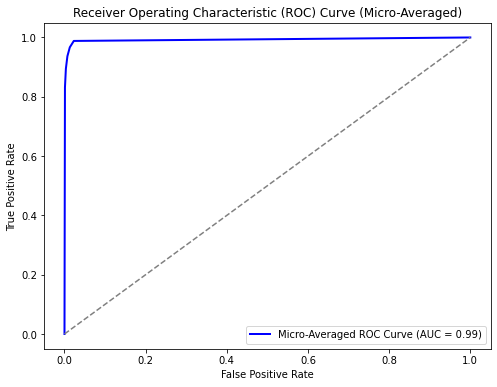

In [131]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Binarize the labels
lb = LabelBinarizer()
y_bin = lb.fit_transform(y)

# Perform cross-validated predictions of probabilities using the best KNN classifier
y_prob_cv = cross_val_predict(best_knn, X, y, cv=5, method='predict_proba')

# Compute micro-averaged ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_bin.ravel(), y_prob_cv.ravel())
auc_score = roc_auc_score(y_bin, y_prob_cv, average='micro')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Micro-Averaged ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Micro-Averaged)')
plt.legend(loc='lower right')
plt.show()


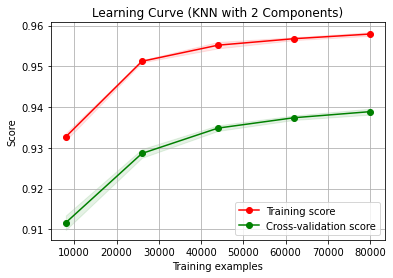

In [135]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

# Plot learning curve for KNN with 3 components
plot_learning_curve(best_knn, "Learning Curve (KNN with 2 Components)", principal_df[['PC1', 'PC2']], principal_df['Cluster'], cv=5, n_jobs=4)
plt.show()


In [139]:
# Calculate the median values for each feature
median_values = lms_data[['LevelEducation','duration_days', 'nevents', 'ndays_act', 'nplay_video', 'nchapters']].median()

# Create new_user_metrics using median values
new_user_metrics = median_values.values.tolist()

# 2. Scaling and PCA Transformation
# Scale the new user metrics using the same scaler used during preprocessing
scaled_new_user_metrics = scaler.transform([new_user_metrics])

# Transform the scaled metrics using the PCA model
transformed_new_user_metrics = pca.transform(scaled_new_user_metrics)

# Use only the first two principal components for KNN prediction
transformed_new_user_metrics = transformed_new_user_metrics[:, :2]

# Predict the cluster for the new user
predicted_cluster = best_knn.predict(transformed_new_user_metrics)

# Retrieve courses associated with the predicted cluster
cluster_courses = principal_df[principal_df['Cluster'] == predicted_cluster[0]].merge(lms_data[['Course']], left_index=True, right_index=True)['Course']

# Calculate lift scores for the courses within the predicted cluster
total_course_counts = lms_data['Course'].value_counts()  # Assuming 'total_course_counts' is calculated earlier
cluster_course_counts = cluster_courses.value_counts()
lift_scores_cluster = (cluster_course_counts / len(cluster_courses)) / (total_course_counts / len(lms_data))

# Sort courses based on lift scores
top_courses_lift = lift_scores_cluster.sort_values(ascending=False).head(5).index.tolist()

# Print recommended courses based on lift scores
print("Recommended Courses based on Lift Scores:")
for i, course in enumerate(top_courses_lift, start=1):
    print(f"{i}. {course}")


Recommended Courses based on Lift Scores:
1. SSchem2
2. Circuits1
3. CS2-MIT
4. HerosX
5. E&M


In [140]:
# Calculate the popularity of each course based on the number of enrollments
course_popularity = lms_data['Course'].value_counts()

# Select the top 5 most popular courses
top_5_popular_courses = course_popularity.head(5).index.tolist()

# Print the recommended courses
print("Recommended Courses for Cold Start Problem:")
for i, course in enumerate(top_5_popular_courses, start=1):
    print(f"{i}. {course}")

Recommended Courses for Cold Start Problem:
1. CS2-MIT
2. CS1-MIT
3. CS1-H
4. JusticeX
5. Circuits1
